In [48]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from PIL import Image

import cv2

import torchvision.transforms as T
import matplotlib.pyplot as plt 
import torchvision

import json
from pathlib import Path
from PIL import Image as PILImage
from PIL import ImageDraw
import IPython
import numpy as np
from math import trunc
import base64
from io import BytesIO

from PIL import Image
import matplotlib.pyplot as plt
import torch

import torchvision.transforms as T

# Segmentação de imagem
* Recurso para identificar regiões de interesse em uma imagem
* Em relação a classificação de imagem, esse recurso permite encontrar diversos objetos de interesse na imagem e classificá-los

## Máscaras
* Anotação da região de interesse em uma imagem
* Diversos softwares auxiliam no processo de criação de máscaras
* ex: vgg image annotator
https://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html

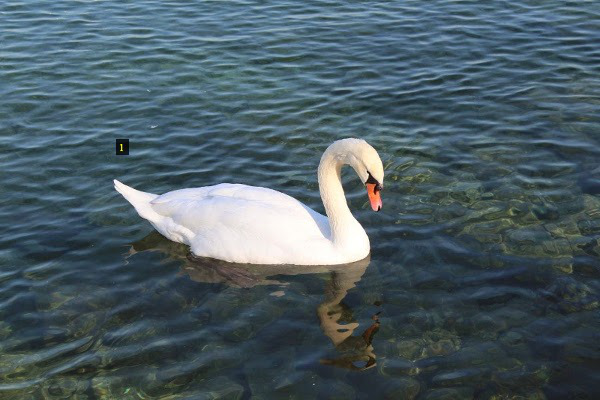

In [2]:
img2 = Image.open('swan1.jpg') 
img2

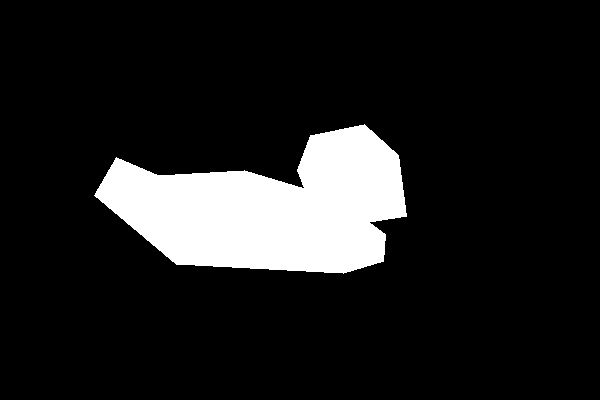

In [3]:
img2 = Image.open('mask1.png') 
img2

# Segmentação de imagem com modelo treinado
* Datasets com máscaras são mais difíceis de encontrar
* Anotação de máscaras é um processo trabalhoso
* Datasets com imagens originais e máscaras, permitem treinar modelos para
    * Identificar um ou mais objetos na imagem
    * Segmentar os objetos na imagem

# Fluxo para desenvolvimento de modelo para segmentação

* Selecionar imagens
* Anotar máscaras na imagem original
    * Identificar a classe da máscara
    * Salvar a descrição da máscara em csv, json, etc

* Utilizar descrição da máscara em csv para definir uma máscara como imagem
* Treinar o modelo submetendo a imagem original e a máscara
    * O retorno do modelo é uma nova imagem
    * Nessa nova imagem é possível identificar
        * Objetos ou regiões segmentadas
    * O loss é calculado verificando a intersecção entre a máscara original e a máscara predita pelo modelo

# representação de máscara por id e posição

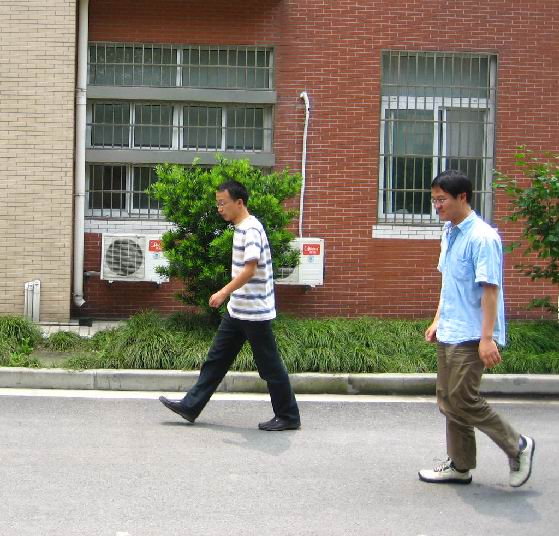

In [92]:
Image.open('FudanPed00001.png')

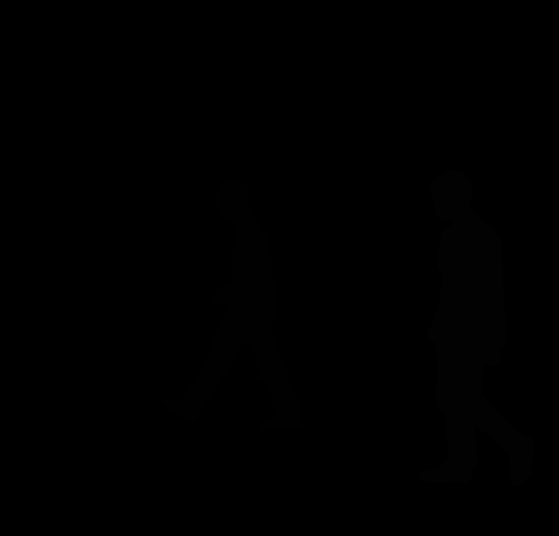

In [94]:
im=Image.open('FudanPed00001_mask.png')
im

# regiao representada como um numero fixo

In [6]:
np.unique(im)

array([0, 1, 2], dtype=uint8)

* função putpalette substitui cada item individual por uma cor, a primeira posição é o fundo

(559, 536)


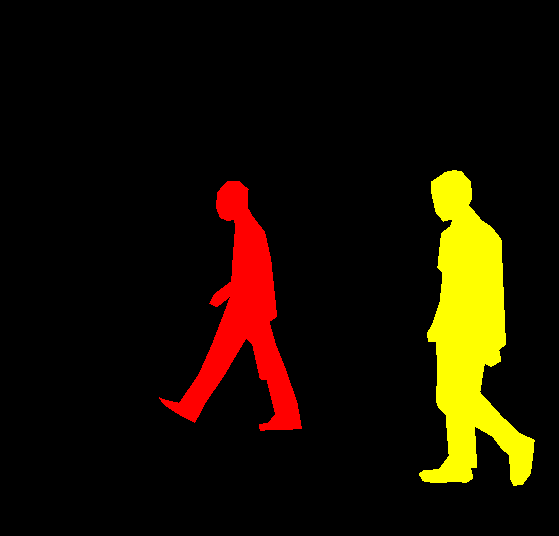

In [7]:
print(im.size)
im.putpalette([
    0, 0, 0, # 1 funda vermelho 
    255, 0, 0, # preto 
    255, 255, 0, # 2 amarelo
    255, 153, 0, # 3 laranja
])
im

# COCO (Common Objects in Context) 
* https://cocodataset.org/#home
* pycoco - biblioteca para manipular elementos do dataset

In [8]:
!ls /home/silvio/dataset/cocodataset/val2014

COCO_val2014_000000000042.jpg  COCO_val2014_000000290981.jpg
COCO_val2014_000000000073.jpg  COCO_val2014_000000291028.jpg
COCO_val2014_000000000074.jpg  COCO_val2014_000000291038.jpg
COCO_val2014_000000000133.jpg  COCO_val2014_000000291048.jpg
COCO_val2014_000000000136.jpg  COCO_val2014_000000291067.jpg
COCO_val2014_000000000139.jpg  COCO_val2014_000000291074.jpg
COCO_val2014_000000000143.jpg  COCO_val2014_000000291115.jpg
COCO_val2014_000000000164.jpg  COCO_val2014_000000291144.jpg
COCO_val2014_000000000192.jpg  COCO_val2014_000000291179.jpg
COCO_val2014_000000000196.jpg  COCO_val2014_000000291202.jpg
COCO_val2014_000000000208.jpg  COCO_val2014_000000291209.jpg
COCO_val2014_000000000241.jpg  COCO_val2014_000000291245.jpg
COCO_val2014_000000000257.jpg  COCO_val2014_000000291251.jpg
COCO_val2014_000000000283.jpg  COCO_val2014_000000291256.jpg
COCO_val2014_000000000285.jpg  COCO_val2014_000000291257.jpg
COCO_val2014_000000000294.jpg  COCO_val2014_000000291286.jpg
COCO_val2014_00000000032

COCO_val2014_000000079619.jpg  COCO_val2014_000000370055.jpg
COCO_val2014_000000079634.jpg  COCO_val2014_000000370090.jpg
COCO_val2014_000000079651.jpg  COCO_val2014_000000370095.jpg
COCO_val2014_000000079653.jpg  COCO_val2014_000000370103.jpg
COCO_val2014_000000079657.jpg  COCO_val2014_000000370116.jpg
COCO_val2014_000000079686.jpg  COCO_val2014_000000370123.jpg
COCO_val2014_000000079689.jpg  COCO_val2014_000000370138.jpg
COCO_val2014_000000079721.jpg  COCO_val2014_000000370165.jpg
COCO_val2014_000000079754.jpg  COCO_val2014_000000370170.jpg
COCO_val2014_000000079816.jpg  COCO_val2014_000000370175.jpg
COCO_val2014_000000079836.jpg  COCO_val2014_000000370207.jpg
COCO_val2014_000000079837.jpg  COCO_val2014_000000370208.jpg
COCO_val2014_000000079841.jpg  COCO_val2014_000000370209.jpg
COCO_val2014_000000079846.jpg  COCO_val2014_000000370210.jpg
COCO_val2014_000000079860.jpg  COCO_val2014_000000370233.jpg
COCO_val2014_000000079868.jpg  COCO_val2014_000000370260.jpg
COCO_val2014_00000007987

COCO_val2014_000000191724.jpg  COCO_val2014_000000483447.jpg
COCO_val2014_000000191738.jpg  COCO_val2014_000000483469.jpg
COCO_val2014_000000191758.jpg  COCO_val2014_000000483475.jpg
COCO_val2014_000000191761.jpg  COCO_val2014_000000483476.jpg
COCO_val2014_000000191772.jpg  COCO_val2014_000000483525.jpg
COCO_val2014_000000191812.jpg  COCO_val2014_000000483531.jpg
COCO_val2014_000000191842.jpg  COCO_val2014_000000483545.jpg
COCO_val2014_000000191845.jpg  COCO_val2014_000000483550.jpg
COCO_val2014_000000191846.jpg  COCO_val2014_000000483553.jpg
COCO_val2014_000000191874.jpg  COCO_val2014_000000483564.jpg
COCO_val2014_000000191893.jpg  COCO_val2014_000000483587.jpg
COCO_val2014_000000191919.jpg  COCO_val2014_000000483643.jpg
COCO_val2014_000000191925.jpg  COCO_val2014_000000483656.jpg
COCO_val2014_000000191949.jpg  COCO_val2014_000000483667.jpg
COCO_val2014_000000191964.jpg  COCO_val2014_000000483705.jpg
COCO_val2014_000000191981.jpg  COCO_val2014_000000483722.jpg
COCO_val2014_00000019199

In [9]:
dataDir='/home/silvio/dataset/cocodataset/'
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# coco API
coco=COCO(annFile)

loading annotations into memory...
Done (t=4.96s)
creating index...
index created!


In [10]:
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

nms=[cat['name'] for cat in cats]
print(len(nms),'Categorias: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print(len(nms),'super categorias: \n{}'.format(' '.join(nms)))

80 Categorias: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

12 super categorias: 
vehicle outdoor person food appliance furniture accessory sports animal kitchen electronic indoor


In [11]:
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [12]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

print('class name', getClassName(77, cats))

class name cell phone


In [13]:
filterClasses = ['laptop', 'tv', 'cell phone']
catIds = coco.getCatIds(catNms=filterClasses);
imgIds = coco.getImgIds(catIds=catIds);

print("quantidade de imagens nas categorias acima:", len(imgIds))

quantidade de imagens nas categorias acima: 83


# mostrando uma imagem da categoria

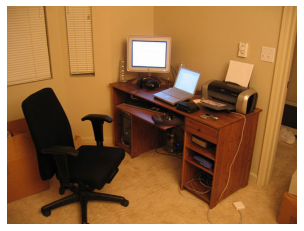

In [14]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

# mostrando as anotações na imagem

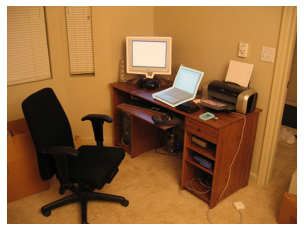

In [15]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

# Filtrando diferentes combinações de objetos em diferentes imagens

In [16]:
classes = ['laptop', 'tv', 'cell phone']

images = []
if classes!=None:
    # iterate classes 
    for className in classes:
        # obtem as imagens contendo as classses pedidas
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# retira repetidas
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("todas as imagens contendo uma ou mais classes:", dataset_size)

todas as imagens contendo uma ou mais classes: 3772


# mostrando máscaras

pixels únicos: [0. 1. 2. 3.]


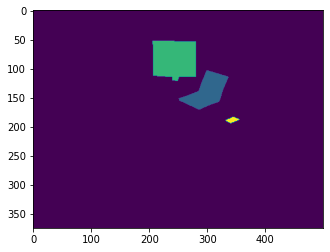

In [17]:
filterClasses = ['laptop', 'tv', 'cell phone']
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    className = getClassName(anns[i]['category_id'], cats)
    pixel_value = filterClasses.index(className)+1
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.imshow(mask)

print('pixels únicos:', np.unique(mask))

# Mascaras binárias

Unique pixel values in the mask are: [0. 1.]


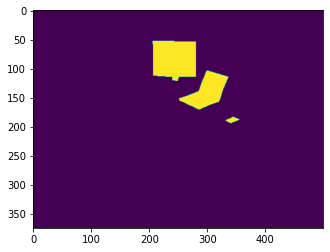

In [18]:
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)

print('Unique pixel values in the mask are:', np.unique(mask))

# criando máscaras a partir de uma imagem e uma mascara anotada

In [19]:
!ls /home/silvio/git/17-CNN/Aula3/imgs

adutta_swan.jpg  wikimedia_death_of_socrates.jpg


In [23]:
instances_json_path = "/home/silvio/git/17-CNN/Aula3/json/via_project_2Mar2021_9h57m_coco.json"
images_path = "/home/silvio/git/17-CNN/Aula3/imgs/adutta_swan.jpg"

#manipulando json       
json_file = open(instances_json_path)
coco = json.load(json_file)
json_file.close()
        
# lendo segmentos da anotação
segmentations = dict()
for segmentation in coco['annotations']:
    image_id = segmentation['image_id']
    if image_id not in segmentations:
        segmentations[image_id] = []
    segmentations[image_id].append(segmentation)
print(segmentations)

image = Image.open(images_path)
image_width, image_height = image.size

#para cada anotação do json
for i, seg in enumerate(segmentations[1]):
    # desenhar o segmento na imagem
    print(i,seg)
            
    instance_masks = []  
    # cria imagem
    mask = PILImage.new('1', (image_width, image_height))
    mask_draw = ImageDraw.ImageDraw(mask, '1')

    for aux in seg['segmentation']:
        mask_draw.polygon(aux, fill=1)
        bool_array = np.array(mask) > 0
        instance_masks.append(bool_array)
                
    mask = np.dstack(instance_masks)        
mask


{1: [{'segmentation': [[116, 157, 94, 195, 176, 264, 343, 273, 383, 261, 385, 234, 369, 222, 406, 216, 398, 155, 364, 124, 310, 135, 297, 170, 304, 188, 244, 170, 158, 175]], 'area': 46488, 'bbox': [94, 124, 312, 149], 'iscrowd': 0, 'id': 1, 'image_id': 1, 'category_id': 1}], 2: [{'segmentation': [[174, 139, 282, 139, 282, 366, 174, 366]], 'area': 24516, 'bbox': [174, 139, 108, 227], 'iscrowd': 0, 'id': 2, 'image_id': 2, 'category_id': 2}, {'segmentation': [[347, 114, 438, 114, 438, 323, 347, 323]], 'area': 19019, 'bbox': [347, 114, 91, 209], 'iscrowd': 0, 'id': 3, 'image_id': 2, 'category_id': 2}, {'segmentation': [[333, 180, 332.935, 181.046, 332.742, 182.084, 332.421, 183.106, 331.975, 184.104, 331.407, 185.071, 330.722, 186, 329.926, 186.883, 329.023, 187.713, 328.021, 188.485, 326.927, 189.193, 325.751, 189.83, 324.5, 190.392, 323.185, 190.876, 321.814, 191.276, 320.4, 191.591, 318.952, 191.818, 317.482, 191.954, 316, 192, 314.518, 191.954, 313.048, 191.818, 311.6, 191.591, 310.18

array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])

# Traduzindo a imagem para ser exibida pelo PIL

(400, 600)


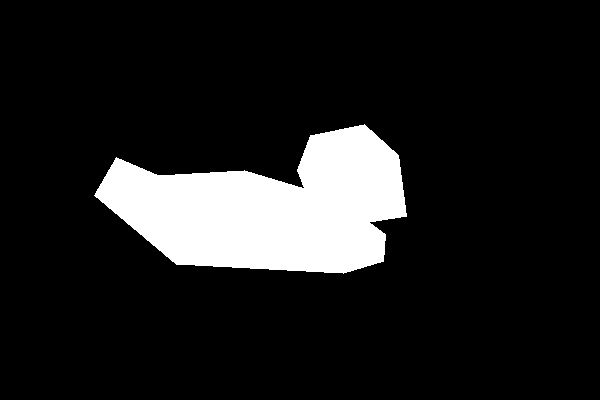

In [24]:
mask2=mask.astype(int) 

mask2=mask2.reshape(400,600)
print(mask2.shape)

im = PILImage.fromarray((mask2 * 255).astype(np.uint8))
im

# Utilizando modelos prontos para identificar objetos na imagem

In [25]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

# Modelo treinadas com categoria cocodataset
* matriz abaixo traduz id da classe para nome

In [26]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# função para fazer a predição com modelo de detecção de objeto
* o modelo retorna lista de objetos encontrados com classe associada e região (retangulo)

In [27]:
def get_prediction(img_path, threshold):
  # carrega a imagem usando componente PIL  
  img = Image.open(img_path) 
  # cria um objeto para representar um objeto como tensor  
  transform = T.Compose([T.ToTensor()]) 
  #aplica a função na imagem
  img = transform(img) 
  # realiza predição com modelo treinado, passando a imagem como entrada  
  pred = model([img]) 
  # O objeto pred criado contém uma lista com todos os lables identidicados
  # o objeto pred_class armazena a categoria encontrada
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] 
  
  print(pred_class)              

  # A função pred_boxes armazena os retangulos encontrados
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes

  # A função pred_score retorna os scores de cada objeto encontrado
  pred_score = list(pred[0]['scores'].detach().numpy())

  ## Obtem índice score maior que limiar passado
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] 

  ## Seleciona apenas as predições acima do limiar passado
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

# função para desenhar resultado das predições na imagem original

In [28]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=2, text_th=1):

  boxes, pred_cls = get_prediction(img_path, threshold) 
  img = cv2.imread(img_path) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  # percorre retangulo encontrados
  for i in range(len(boxes)):
    # desenha o retangulo na imagem passada  
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure(figsize=(20,30)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

['person', 'person', 'person', 'person', 'person', 'car', 'person', 'handbag', 'stop sign', 'car', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'car', 'person', 'handbag', 'person', 'person', 'handbag', 'person', 'person', 'handbag', 'person', 'person', 'person', 'person', 'person', 'person', 'handbag', 'person', 'person', 'handbag', 'handbag', 'person', 'person', 'person', 'handbag', 'car', 'oven', 'handbag', 'handbag', 'handbag', 'stop sign', 'person', 'person', 'person', 'person', 'handbag', 'person', 'bench', 'person', 'clock', 'person', 'person', 'person', 'handbag', 'person', 'baseball glove', 'person', 'car', 'person', 'truck', 'backpack', 'backpack', 'backpack', 'car', 'umbrella', 'backpack', 'backpack']


<ipython-input-28-e0e0643356cc>:9: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
<ipython-input-28-e0e0643356cc>:10: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class


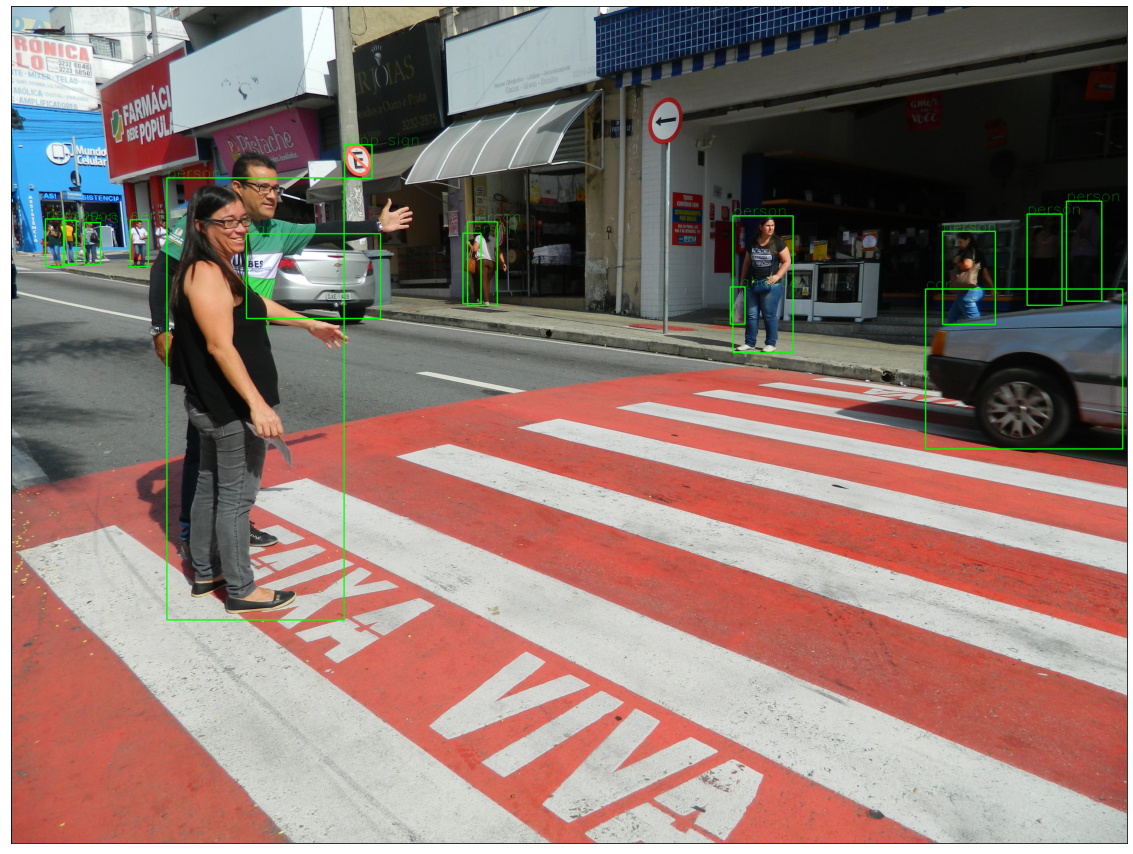

In [97]:
object_detection_api('6.jpg', threshold=0.8)
#object_detection_api('abey-road.jpg', threshold=0.8)

# carregando modelo para segmentação

In [31]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

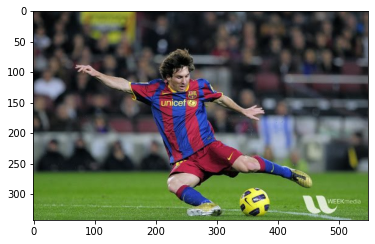

In [77]:
#img = Image.open('bird.png')
#img = Image.open('swan1.jpg')
img = Image.open('messi5.jpg')
plt.imshow(img); 
plt.show()

In [78]:
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
imaux=trf(img)
print(imaux.shape)

inp = trf(img).unsqueeze(0)
print(inp.shape)
inp2 = trf(img).unsqueeze(1)
print(inp2.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([3, 1, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


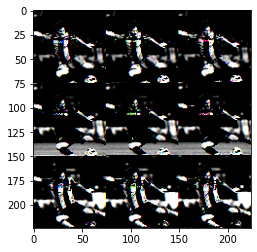

In [79]:
ax=imaux.reshape(224,224,3)
plt.imshow(ax)

In [85]:
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


* squeeze : retorna novo tensor com todas as dimensões 1 removidas
* detach : retina informação de gradiente
* argmax : retorna o indice dos maximos valores em uma dimensão 

In [86]:
print(out.shape)
ax=out.squeeze()
print(ax.shape)

ax = torch.argmax(out.squeeze(), dim=0)
print(ax.shape)

torch.Size([1, 21, 224, 224])
torch.Size([21, 224, 224])
torch.Size([224, 224])


In [87]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (np.unique(om))

[ 0 15]


In [88]:
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  print(label_colors)

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  #print(r,g,b)
  for l in range(0, nc):
    #print(nc)
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    #print(label_colors[l, 0] , label_colors[l, 1], label_colors[l, 2])
    #print(image.shape,idx.shape)
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [89]:
print(om.shape)

(224, 224)


[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]
 [  0  64 128]]


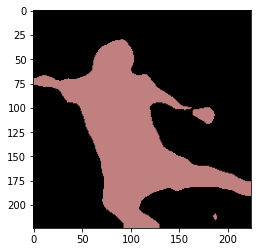

In [90]:
rgb = decode_segmap(om)
plt.imshow(rgb); 
plt.show()